<a href="https://colab.research.google.com/github/umanari145/python_ai/blob/main/zerokara_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# フォントインストール
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 32.8 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=82e73fcddaa6f901c0e2f2a64d896c893b3bb0a17fbfe9679128d28212ee6e04
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [98]:
# お弁当の需要予測
# 【ゼロから始めるデータ分析】 ビジネスケースで学ぶPythonデータサイエンス入門

import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib
drive.mount('/content/drive')
# fontの設定

train = pd.read_csv('/content/drive/My Drive/bento_train.csv')
train.head() # 逆はtrain.tail() head(5)のようにするとトップから5行

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


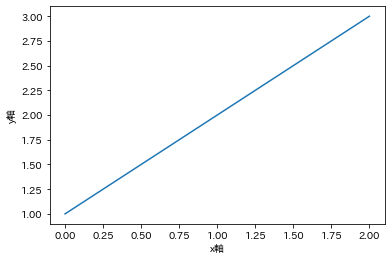

In [99]:
#フォント設定

plt.plot([1, 2, 3])
plt.xlabel('x軸')
plt.ylabel('y軸')
plt.show()

In [ ]:
# 行数と列数を取得
train.shape


(207, 12)

In [ ]:
# データの型がわかる
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [ ]:
# yの平均値
train["y"].mean()

86.6231884057971

In [ ]:
#yの中央値
train["y"].median()

78.0

In [ ]:
# yが150以上になっている場合
train[train["y"]>=150]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
10,2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
11,2013-12-3,153,火,1,厚揚げ豚生姜炒め,NaN,NaN,NaN,NaN,快晴,--,13.9
12,2013-12-4,151,水,1,クリームチーズ入りメンチ,NaN,NaN,NaN,NaN,晴れ,--,13.5
13,2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8
15,2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
16,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1
17,2013-12-11,157,水,0,五目御飯,NaN,NaN,NaN,NaN,曇,--,11.0
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
23,2013-12-19,151,木,0,ポーク味噌焼き,NaN,NaN,NaN,NaN,雨,0.5,6.8


In [ ]:
# 月曜日のデータ
train[train["week"]=="月"].head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
10,2013-12-2,151,月,1,マーボ豆腐,NaN,NaN,NaN,NaN,快晴,--,13.8
15,2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
20,2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
36,2014-1-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,NaN,晴れ,--,6.5
41,2014-1-27,126,月,1,チンジャオロース,415.0,NaN,NaN,NaN,快晴,--,5.1
46,2014-2-3,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,NaN,晴れ,--,15.9
51,2014-2-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
55,2014-2-17,137,月,1,チンジャオロース,416.0,NaN,NaN,NaN,晴れ,--,11.6


In [ ]:
#火曜日かつyの値でソート
train[train["week"]=="火"].sort_values(by="y").head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
206,2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
176,2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4
157,2014-7-15,51,火,0,豚冷シャブ野菜添え,324.0,NaN,NaN,NaN,晴れ,--,30.3
166,2014-7-29,52,火,0,バーベキューチキン,449.0,NaN,NaN,NaN,晴れ,--,30.4
178,2014-8-19,53,火,1,牛スキヤキ,385.0,NaN,NaN,NaN,晴れ,--,33.3
161,2014-7-22,53,火,0,チンジャオロース,409.0,NaN,NaN,NaN,晴れ,--,30.2
147,2014-7-1,54,火,0,カレイ唐揚げ夏野菜あん,362.0,NaN,NaN,NaN,曇,--,28.3
171,2014-8-5,54,火,1,鶏肉のカレー唐揚,400.0,NaN,NaN,NaN,快晴,--,34.3
132,2014-6-10,56,火,0,カレイ唐揚げ野菜餡かけ,426.0,NaN,NaN,1.0,曇,--,25.5
152,2014-7-8,56,火,0,かじきの甘辛煮,370.0,NaN,NaN,NaN,晴れ,--,29.7


In [ ]:
#降順
train[train["week"]=="火"].sort_values(by="y", ascending=False).head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
16,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1
11,2013-12-3,153,火,1,厚揚げ豚生姜炒め,NaN,NaN,NaN,NaN,快晴,--,13.9
21,2013-12-17,145,火,0,手作りヒレカツ,NaN,NaN,ママの会,NaN,曇,--,10.8
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
28,2014-1-7,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
32,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8
37,2014-1-21,129,火,1,サバ焼味噌掛け,447.0,NaN,NaN,NaN,快晴,--,10.4
85,2014-4-1,125,火,1,メンチカツ,377.0,NaN,NaN,NaN,薄曇,--,16.1
25,2013-12-24,122,火,0,さっくりメンチカツ,NaN,NaN,NaN,NaN,快晴,--,11.5
47,2014-2-4,121,火,1,さわら焼味噌掛け,430.0,NaN,NaN,NaN,雨,0,3.8


In [ ]:
# 月曜のyの平均値
train[train["week"]=="月"]["y"].mean()

94.05128205128206

In [ ]:
temp_mean = train["temperature"].mean()
print(temp_mean)
train[train["temperature"]>=temp_mean]

19.252173913043478


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
90,2014-4-8,96,火,1,肉団子のシチュー,353.0,NaN,NaN,NaN,快晴,--,20.1
92,2014-4-10,87,木,0,鶏の唐揚げおろしソース,362.0,NaN,NaN,1.0,晴れ,--,21.3
95,2014-4-15,82,火,0,ポーク生姜焼き,370.0,NaN,NaN,NaN,快晴,--,19.7
96,2014-4-16,57,水,0,カレイ唐揚げ野菜あんかけ,330.0,NaN,NaN,NaN,薄曇,--,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [ ]:
# 複数のカラム
train[["y","week", "temperature"]]

,y,week,temperature
0,90,月,19.8
1,101,火,17.0
2,118,水,15.5
3,120,木,15.2
4,130,金,16.1
...,...,...,...
202,59,水,24.8
203,50,木,25.4
204,45,金,27.1
205,56,月,26.6


## 主にグラフ化について

Text(0, 0.5, '売上')

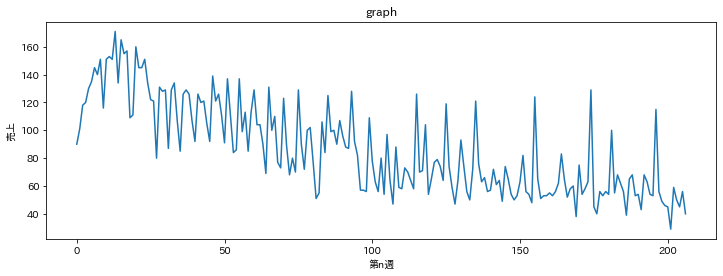

In [101]:
# 折れ線グラフの記載
# titleはグラフタイトル、figsizeは大きさを表すオプション
ax = train["y"].plot(title="graph", figsize=(12,4))
# ラベルの設定
ax.set_xlabel("第n週")
ax.set_ylabel("売上")

## ヒストグラムについて

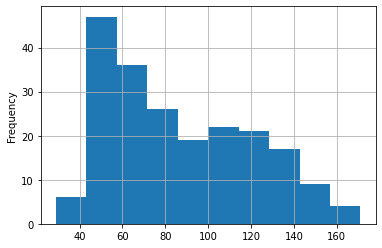

In [ ]:
#ヒストグラムの記述(gridあり)
hist_gram = train["y"].plot.hist(grid=True)

In [ ]:
y_mean = train["y"].mean()
y_mean

86.6231884057971

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


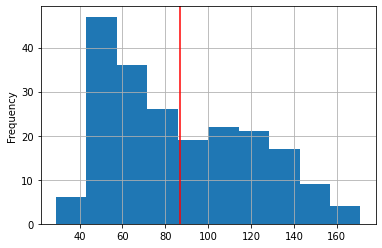

In [ ]:
# 平均値を赤線でひく
# fromが読み込まれていない・・・？ここで書かないとpltがdefinedされないというエラーが出る
from matplotlib import pyplot as plt
hist_gram = train["y"].plot.hist(grid=True)
hist_gram.axvline(x=y_mean, color="red")
# 以下を入れると画像として保存される
plt.savefig("/content/drive/My Drive/histgram.png")

## 箱ひげ図

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


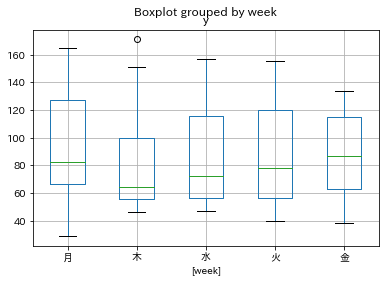

In [100]:
plt.rcParams["font.size"] = 10
train[["y", "week"]].boxplot(by="week")

## 欠損値について

In [103]:
# 欠損値の測定 (欠損値があるものを表示)

train.isnull().any()

datetime         False
y                False
week             False
soldout          False
name             False
kcal              True
remarks           True
event             True
payday            True
weather          False
precipitation    False
temperature      False
dtype: bool

In [105]:
# 欠損値の数
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [106]:
#NaNを0にしてくれる
train.fillna(0)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,0.0,0,0,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,0.0,0,0,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,0.0,0,0,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,0.0,0,0,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,0.0,0,0,0.0,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,0,0,0.0,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,0,0,0.0,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,0.0,スペシャルメニュー（800円）,キャリアアップ支援セミナー,0.0,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,0,0,0.0,快晴,--,26.6


In [107]:
# どれか一つでも削除があった場合は行自体を消すため、何も出てこない
train.dropna()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature


In [108]:
#kcalに欠損値があったら除去したい
train.dropna(subset=["kcal"])

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
28,2014-1-7,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,NaN,快晴,--,7.3
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
30,2014-1-9,129,木,1,鶏チリソース,435.0,NaN,NaN,NaN,曇,--,10.9
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
32,2014-1-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,NaN,晴れ,--,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [109]:
# 値ごとの分布
train["precipitation"].value_counts()

--     169
0       23
0.5      9
1.5      2
1        1
6        1
6.5      1
2.5      1
Name: precipitation, dtype: int64

## 相関関係と散布図

In [111]:
# 相関係数
train[["y", "temperature"]].corr()

,y,temperature
y,1.000000,-0.655332
temperature,-0.655332,1.000000


In [112]:
# 弱い相関
train[["y", "kcal"]].corr()

,y,kcal
y,1.000000,0.147269
kcal,0.147269,1.000000


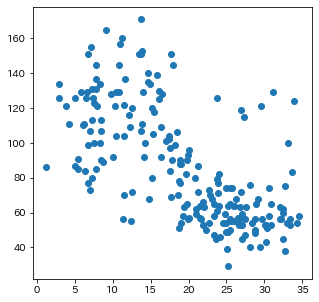

In [121]:
# 散布図
plt.figure(figsize=(5,5))
x=train["temperature"]
y=train["y"]
plt.scatter(x,y)